In [104]:
# -*- coding: utf-8 
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from scipy.stats import kendalltau
from matplotlib import pyplot as plt
sns.set(style="ticks")
plt.rcParams['font.sans-serif']=['SimHei'] 
%matplotlib inline
data_file = './data/2015-2017_score-boxoffice.csv'

首先我们读入已经采集和清洗完成的电影信息，包括从2015年到2017年的票房2000万以上电影的票房和豆瓣评分信息。
考虑到每年的票房不能单纯的直接拿来比较，我们这里给电影票房赋予了当年平均票房倒数的权重，这种做法在中国这种**电影市场高速发展**的情况下较为适用，如果是美国这类较为成熟的电影市场，则会主要考虑通货膨胀带来的影响。  
同时，为了绘图效果更好，我们给*NewBoxOffice*再加个log来进行scale。

In [105]:
data = pd.read_csv(data_file)
data['NewBoxOffice'] = data.apply(lambda row: np.log(row['BoxOffice'] / data[data['Year']==row['Year']]['BoxOffice'].mean()), axis=1)

下面我们对处理后的票房排序，看下近年谁是最吸金的电影。  
可以看出战狼当之无愧是票房之首，有趣的是，在票房前10中，大部分都带有**喜剧**或(和)**动作**元素。  
即使澳门风云3比2的影片质量还烂，但依旧取得了不俗的票房收入。这和巨星云集，合家欢的性质以及春节档没有其他太多竞争对手不无关系。

In [106]:
data.sort_values(by='NewBoxOffice', ascending=False).head(20)

,Name,Score,BoxOffice,Year,NewBoxOffice
50,战狼2,7.4,561099,2017,2.813004
218,美人鱼,6.8,339213,2016,2.438079
195,捉妖记,6.8,244000,2015,2.170106
159,寻龙诀,7.5,168274,2015,1.798532
61,港囧,5.7,161410,2015,1.756886
75,功夫瑜伽,5.1,175259,2017,1.649372
135,夏洛特烦恼,7.4,144161,2015,1.643869
49,西游伏妖篇,5.6,165593,2017,1.592640
163,煎饼侠,6.0,116273,2015,1.428879
36,西游记之孙悟空三打白骨精,5.7,120102,2016,1.399792


看完了叫座排行，不妨来看看较好排行。  
非常令人汗颜的是，排名第一的是大话西游的2017重新剪辑版，第二的准确来说也不算是国产电影(李安是美籍华裔)。  
真正算作国产力量的得从驴得水算起，然后是当年无数“自来水”的大圣归来。
非常可惜的是，前十中有一半的票房尚不过亿，分别靠着各个高校路演和“下跪求排片”大护法和百鸟朝凤才堪堪获得八千万的票房，实在有些心酸。

In [107]:
data.sort_values(by='Score', ascending=False).head(20)

,Name,Score,BoxOffice,Year,NewBoxOffice
199,大话西游之大圣娶亲,9.2,18916,2017,-0.576885
104,比利·林恩的中场战事,8.4,16519,2016,-0.584038
9,驴得水,8.3,17306,2016,-0.537496
233,西游记之大圣归来,8.2,95652,2015,1.233655
146,重返·狼群,8.1,3281,2017,-2.328745
185,师父,8.1,5482,2015,-1.625592
180,百鸟朝凤,8.0,8695,2016,-1.225801
136,大护法,8.0,8729,2017,-1.350243
234,我们诞生在中国,8.0,6658,2016,-1.492730
110,老炮儿,8.0,90280,2015,1.175854


In [108]:
import matplotlib
matplotlib.matplotlib_fname() 

'/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

Help on function title in module matplotlib.pyplot:

title(s, *args, **kwargs)
    Set a title of the current axes.
    
    Set one of the three available axes titles. The available titles are
    positioned above the axes in the center, flush with the left edge,
    and flush with the right edge.
    
    .. seealso::
        See :func:`~matplotlib.pyplot.text` for adding text
        to the current axes
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default `fontdict` is:
    
            {'fontsize': rcParams['axes.titlesize'],
            'fontweight' : rcParams['axes.titleweight'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, str, optional
        Which title to set, defaults to 'center'
    
    Returns
    -------
    text : :class:`~matplotlib.text.Text`


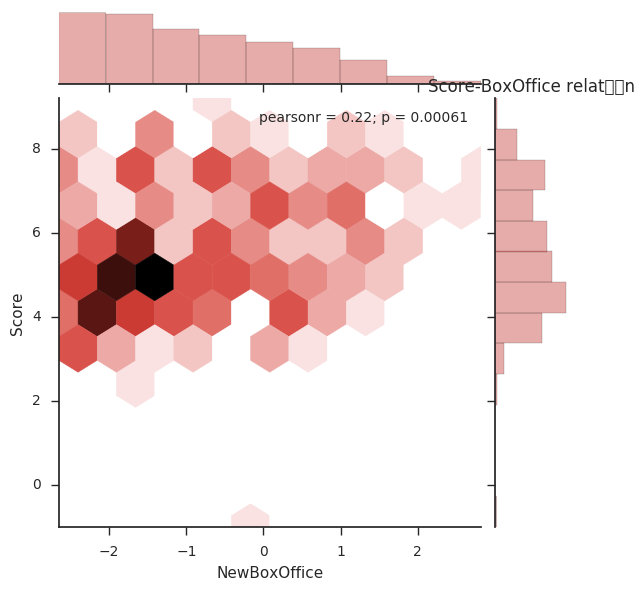

In [116]:

sns.jointplot(x='NewBoxOffice', y='Score', data=data, kind='hex',color="#C03028", ratio=5)
plt.rcParams['font.sans-serif']=['SimHei'] 
help(plt.title)
plt
plt.show()